In [438]:
import torch
import matplotlib.pyplot as plt

In [439]:
age = torch.randint(low=18, high=60, size=(20,)).float()
sal = torch.randint(low=20000, high=100000, size=(20,)).float()

x_train = [age, sal]

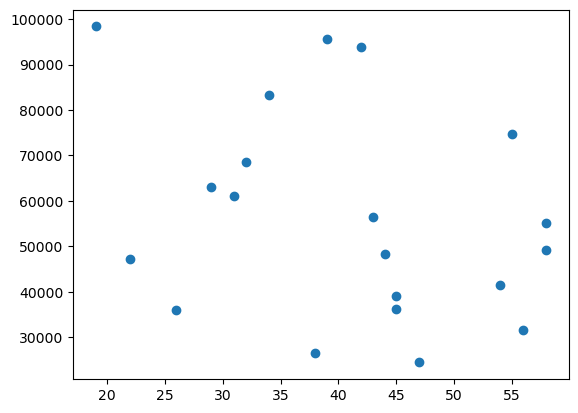

In [440]:
plt.scatter(age, sal)
plt.show()

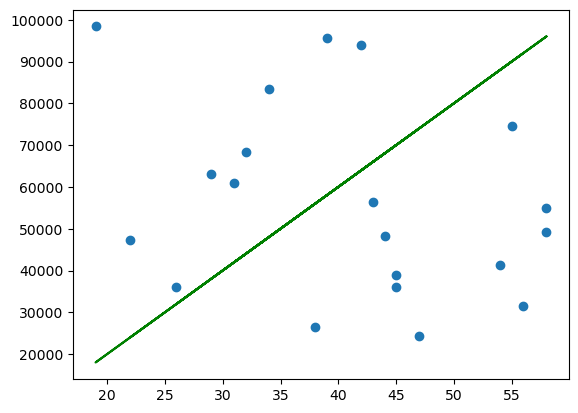

In [441]:
from re import A

x00, x01 = 25, 30000
x10, x11 = 30, 40000

a = (x11 - x01) / (x10 - x00)
b = x01 - a * x00

line = a * age + b

plt.scatter(age, sal)
plt.plot(age, line, color='green')
plt.show()

In [442]:
y = sal - line
y_train = (y > 0).float()

y_pos = (y > 0)
y_neg = (y < 0)

print(f"{y_pos=}")
print(f"{y_neg=}")

y_pos=tensor([False,  True,  True, False,  True,  True,  True, False, False,  True,
        False,  True, False, False, False, False,  True, False,  True, False])
y_neg=tensor([ True, False, False,  True, False, False, False,  True,  True, False,
         True, False,  True,  True,  True,  True, False,  True, False,  True])


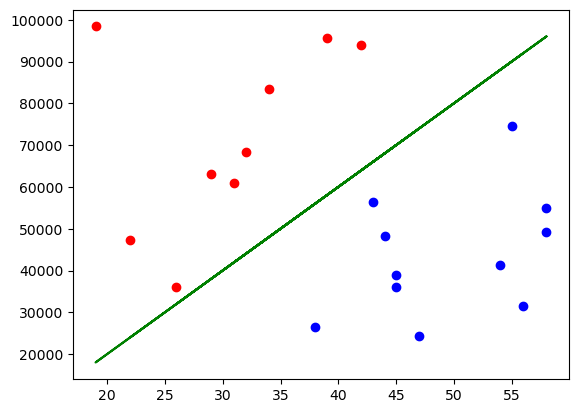

In [443]:
x_pos = [age[y_pos], sal[y_pos]]
x_neg = [age[y_neg], sal[y_neg]]

plt.scatter(x_pos[0], x_pos[1], color='red')
plt.scatter(x_neg[0], x_neg[1], color='blue')
plt.plot(age, line, color='green')
plt.show()

In [444]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [445]:
def visulization(w0, w1, w2, x_train, y_train):
    line = (-w0 - w1 * x_train[0]) / w2
    plt.clf()
    plt.figure()
    plt.scatter(x_train[0][y_train == 1], x_train[1][y_train == 1], color='red')
    plt.scatter(x_train[0][y_train == 0], x_train[1][y_train == 0], color='blue')
    plt.plot(x_train[0], line, color='green')
    plt.show()

In [446]:
def train(x_train, y_train, w0, w1, w2, learning_rate, T):
    for t in range(T):
        y_predict = sigmoid(w1 * x_train[0] + w2 * x_train[1] + w0)
        
        visulization(w0, w1, w2, x_train, y_train)

        w0_grad = (y_predict - y_train).mean()
        w1_grad = ((y_predict - y_train) * x_train[0]).mean()
        w2_grad = ((y_predict - y_train) * x_train[1]).mean()
        
        w0 -= learning_rate * w0_grad
        w1 -= learning_rate * w1_grad
        w2 -= learning_rate * w2_grad       
    return w0, w1, w2

<Figure size 640x480 with 0 Axes>

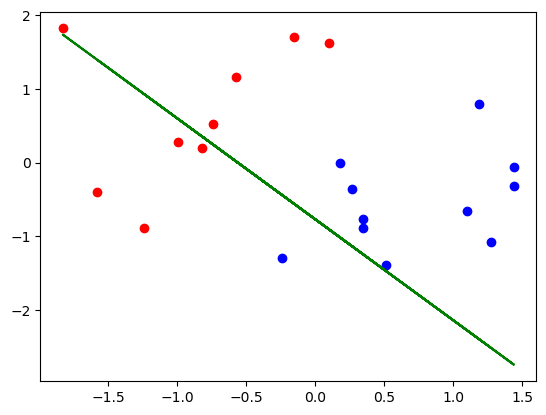

<Figure size 640x480 with 0 Axes>

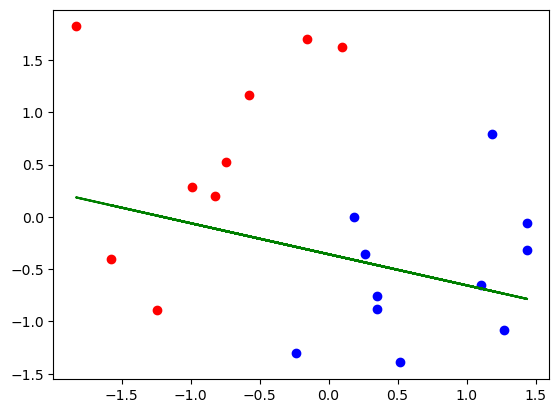

<Figure size 640x480 with 0 Axes>

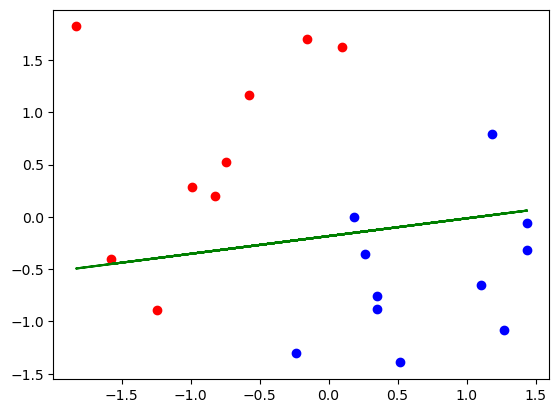

<Figure size 640x480 with 0 Axes>

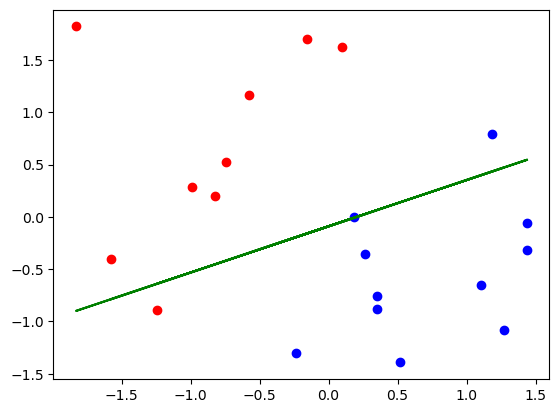

<Figure size 640x480 with 0 Axes>

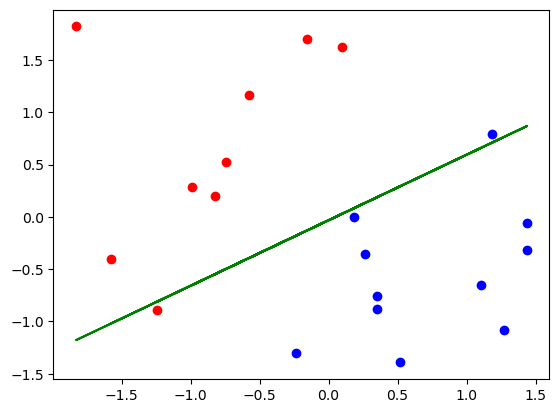

<Figure size 640x480 with 0 Axes>

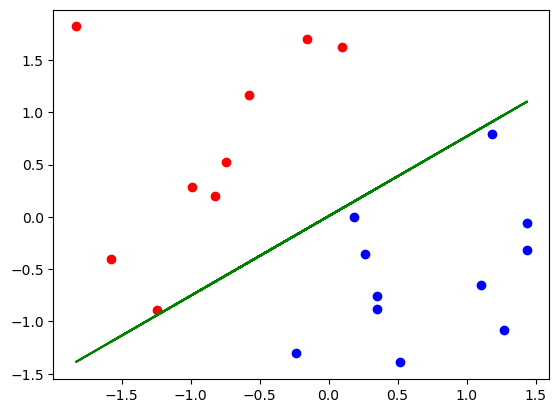

<Figure size 640x480 with 0 Axes>

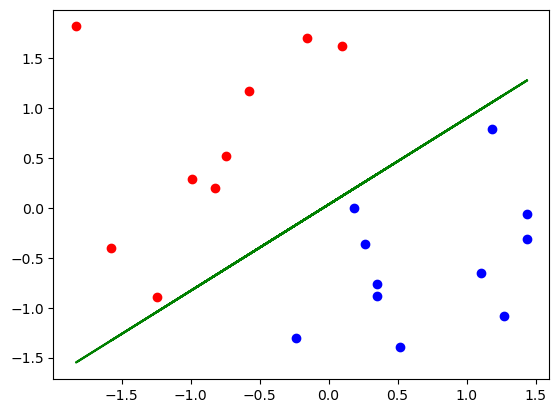

<Figure size 640x480 with 0 Axes>

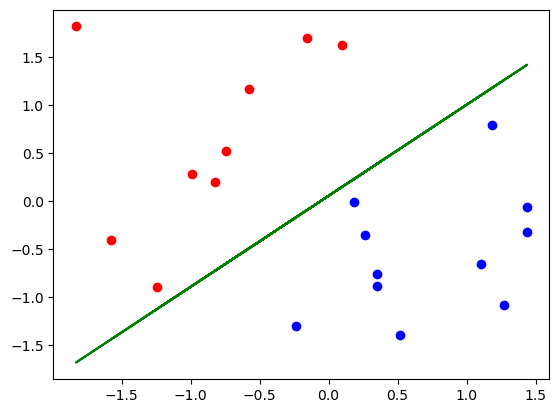

<Figure size 640x480 with 0 Axes>

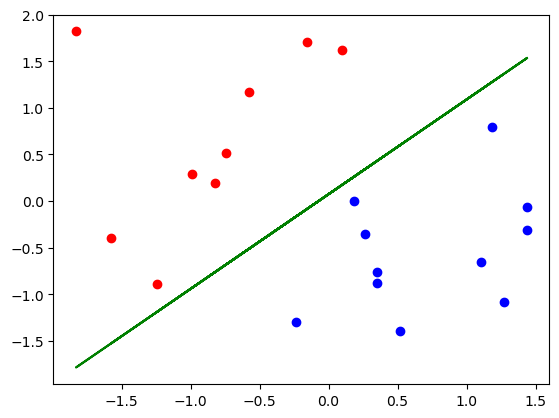

<Figure size 640x480 with 0 Axes>

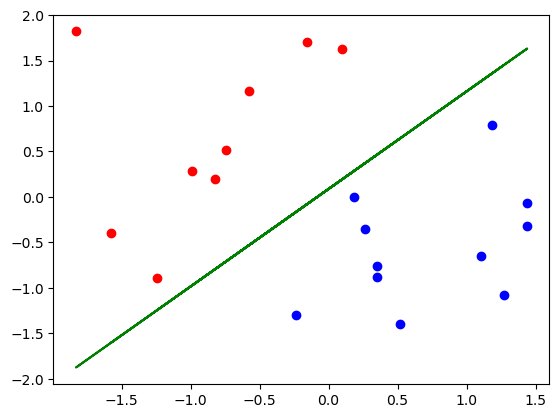

(tensor(-0.1333), tensor(-1.4891), tensor(1.3285))

In [447]:
T = 10
learning_rate = 0.9
w0, w1, w2 = torch.rand(3)

x_train_norm = [(x - x.mean()) / x.std() for x in x_train]

train(x_train=x_train_norm, 
      y_train=y_train, 
      w0=w0, 
      w1=w1, 
      w2=w2, 
      learning_rate=learning_rate, 
      T=T)